<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328925 entries, 0 to 328924
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AI401_CO2                328925 non-null  float64
 1   AI401_CH4                328925 non-null  float64
 2   AI401_O2                 328925 non-null  float64
 3   AI401_N2                 328925 non-null  float64
 4   AI401_H20                328925 non-null  float64
 5   FIT501                   328925 non-null  float64
 6   Vazão_Biowash            328925 non-null  float64
 7   Temperatura_Biowash      328925 non-null  float64
 8   AI201_H2S                328925 non-null  float64
 9   AI201_CO2                328925 non-null  float64
 10  AI201_CH4                328925 non-null  float64
 11  AI201_O2                 328925 non-null  float64
 12  Vazão_Gerador            328925 non-null  float64
 13  RPM_Máquina              328925 non-null  float64
 14  CO2_

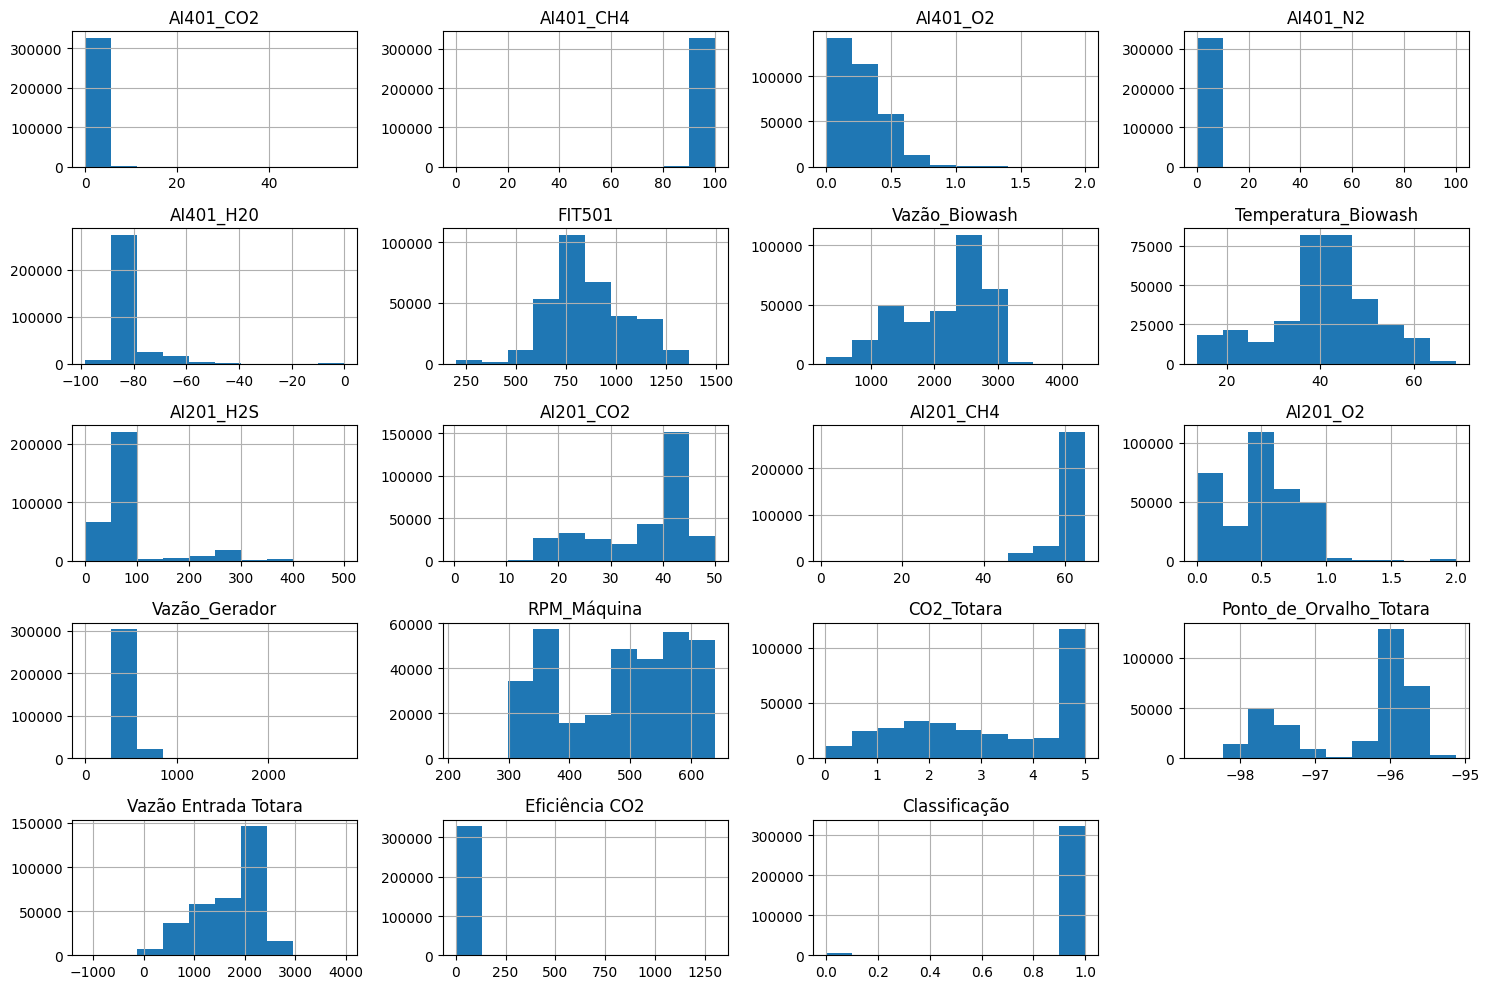

In [5]:
#%pip install pandas
#%pip install torch torchvision torchaudio
# Importanto Pandas
import pandas as pd
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Import Para Métricas

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Lendo dados de um CSV
data = pd.read_csv("DataSet.csv",sep=';', decimal=',', encoding='utf-8')
#print(data)

# Transformando um arquivos em um DataFrame
my_df = pd.DataFrame(data)
teste = my_df.info()

X = my_df.iloc[:, :18]
Y = my_df[['Classificação']]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Quantia de valores")
print(Y['Classificação'].value_counts())
print(teste)
my_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [6]:
class TOTARAFaultsDataset(Dataset):
    def __init__(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, (pd.DataFrame, pd.Series)):
            Y = y.to_numpy()
        # Criação dos tensores a partir dos arrays
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(Y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset de Treino e Dataset de Test
train_dataset = TOTARAFaultsDataset(X_train, y_train)
test_dataset = TOTARAFaultsDataset(X_test, y_test)

#-------------------------------------------------------
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [7]:

# Exemplo de exibição de um batch do DataLoader de treino:
for batch_features, batch_labels in train_loader:
    print("Formato das features do batch:", batch_features.shape)
    print("Formato dos rótulos do batch:", batch_labels.shape)
    break


input_dim = 18         # Número de features
hidden_dims = [256, 128] # Camadas ocultas: primeira com 64, segunda com 32 neurônios
output_dim = 1         # Número de classes

# Modelo utilizando nn.Sequential
model = nn.Sequential(
    nn.Linear(input_dim, hidden_dims[0]),
    nn.ReLU(),
    nn.Linear(hidden_dims[0], hidden_dims[1]),
    nn.ReLU(),
    nn.Linear(hidden_dims[1], output_dim)
)
print(model)

learning_rate = 0.002



Formato das features do batch: torch.Size([32, 18])
Formato dos rótulos do batch: torch.Size([32, 1])
Sequential(
  (0): Linear(in_features=18, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=1, bias=True)
)


In [8]:
# Critério de Perda e Otimizador
#criterion = nn.CrossEntropyLoss()
criterion =nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 40  # Número de épocas de treinamento
losses = []      # Lista para armazenar a perda por época

for epoch in range(num_epochs):
    model.train()  # Coloca o modelo em modo de treinamento
    running_loss = 0.0

    # Loop sobre os batches do train_loader
    for features, labels in train_loader:
        optimizer.zero_grad()      # Zera os gradientes
        outputs = model(features)  # Passagem forward
        loss = criterion(outputs, labels)
        loss.backward()            # Backpropagation
        optimizer.step()           # Atualização dos pesos

        running_loss += loss.item() * features.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    losses.append(epoch_loss)
    print(f"Época [{epoch+1}/{num_epochs}] - Perda: {epoch_loss:.4f}")



Época [1/40] - Perda: 0.1920
Época [2/40] - Perda: 0.0537
Época [3/40] - Perda: 0.0516
Época [4/40] - Perda: 0.0501
Época [5/40] - Perda: 0.0494
Época [6/40] - Perda: 0.0490
Época [7/40] - Perda: 0.0483
Época [8/40] - Perda: 0.0485
Época [9/40] - Perda: 0.0490
Época [10/40] - Perda: 0.0486
Época [11/40] - Perda: 0.0474
Época [12/40] - Perda: 0.0485
Época [13/40] - Perda: 0.0467
Época [14/40] - Perda: 0.0469
Época [15/40] - Perda: 0.0470
Época [16/40] - Perda: 0.0466
Época [17/40] - Perda: 0.0461
Época [18/40] - Perda: 0.0466
Época [19/40] - Perda: 0.0464
Época [20/40] - Perda: 0.0466
Época [21/40] - Perda: 0.0457
Época [22/40] - Perda: 0.0475
Época [23/40] - Perda: 0.0458
Época [24/40] - Perda: 0.0458
Época [25/40] - Perda: 0.0466
Época [26/40] - Perda: 0.0486
Época [27/40] - Perda: 0.0462
Época [28/40] - Perda: 0.0462
Época [29/40] - Perda: 0.0456
Época [30/40] - Perda: 0.0452
Época [31/40] - Perda: 0.0449
Época [32/40] - Perda: 0.0452
Época [33/40] - Perda: 0.0450
Época [34/40] - Per

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        probs = torch.sigmoid(outputs)  # aplica sigmoid para obter probabilidade
        preds = (probs > 0.4).float()   # altera o threshold aqui se quiser,
        #preds = torch.sigmoid(outputs).round()  # arredonda para 0 ou 1
        all_preds.extend(preds.cpu().numpy().flatten())
        all_labels.extend(labels.cpu().numpy().flatten())

# Cálculo das métricas
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print("\n=== Avaliação no conjunto de teste ===")
print(f"Acurácia:  {accuracy:.4f}")
print(f"Precisão:  {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(all_labels, all_preds))

print("\nRelatório de Classificação:")
print(classification_report(all_labels, all_preds))

# --------------------------------------------------------------------------------------------------------------------------------
#def evaluate_model(model, data_loader):
#    model.eval()  # Coloca o modelo em modo de avaliação
#    all_preds = []
#    all_labels = []

#    with torch.no_grad():
#        for features, labels in data_loader:
#            outputs = model(features)

            # Se for classificação multiclasse
       #     _, preds = torch.max(outputs, 1)

#            all_preds.extend(preds.cpu().numpy())
#            all_labels.extend(labels.cpu().numpy().astype(int).flatten())

#    acc = accuracy_score(all_labels, all_preds)
#    prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
#    rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
#    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

#    print("Acurácia :", acc)
#    print("Precisão :", prec)
#    print("Recall   :", rec)
#    print("F1-Score :", f1)
#    print("\nMatriz de Confusão:")
#    print(confusion_matrix(all_labels, all_preds))
#    print("\nRelatório de Classificação:")
#    print(classification_report(all_labels, all_preds, zero_division=0))


#Consultar Documento da Aula 4 Para tirar Dúvidas:
#Como incluir esse código na estrutura criada:
 #   classifier = create_classifier()
  #  model = train_classifier(classifier, X_train, y_train)
   # accuracy, report = evaluate_classifier(model, X_test, y_test)

   # print("Model Accuracy: {:.2f}%".format(accuracy * 100))
   # print("\nClassification Report:")
   # print(report)



=== Avaliação no conjunto de teste ===
Acurácia:  0.9912
Precisão:  0.9911
Recall:    1.0000
F1-Score:  0.9955

Matriz de Confusão:
[[  554   580]
 [    1 64650]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66      1134
         1.0       0.99      1.00      1.00     64651

    accuracy                           0.99     65785
   macro avg       0.99      0.74      0.83     65785
weighted avg       0.99      0.99      0.99     65785



In [10]:
# Salvar os pesos do modelo
torch.save(model.state_dict(), "modelo_classificador.pth")

In [11]:
# Recrie o mesmo modelo com a mesma arquitetura
model = nn.Sequential(
    nn.Linear(input_dim, hidden_dims[0]),
    nn.ReLU(),
    nn.Linear(hidden_dims[0], hidden_dims[1]),
    nn.ReLU(),
    nn.Linear(hidden_dims[1], output_dim)
)

# Carregar os pesos
model.load_state_dict(torch.load("modelo_classificador.pth"))
model.eval()  # Coloca o modelo em modo de inferência
print("Modelo carregado com sucesso")


Modelo carregado com sucesso
